In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('/content/placement (2).csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package (in LPA)')

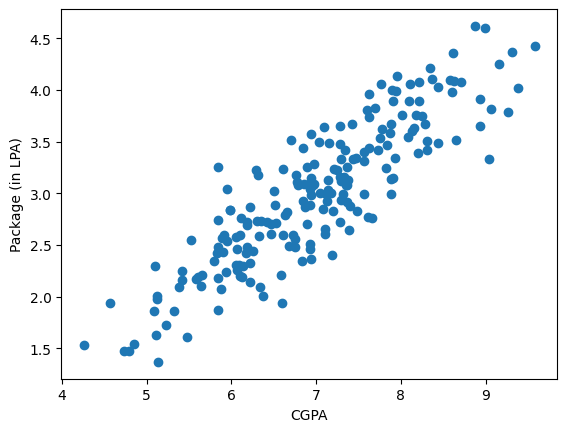

In [4]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')

In [5]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [6]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package (in LPA)')

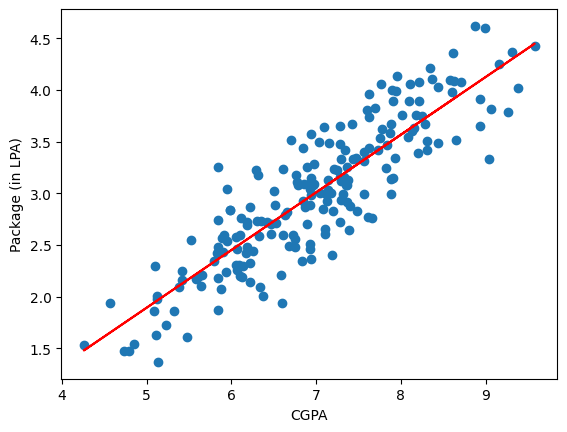

In [11]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')

# **Regression Metrics**

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
y_pred = lr.predict(X_test)

In [15]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [16]:
print("MAE", mean_absolute_error(y_test, y_pred) )

MAE 0.2884710931878175


**This MAE is in terms of LPA, we can infer that .28 LPA ka glti kr rha hai mera model.**

In [17]:
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 0.12129235313495527


**MSE is not in LPA**

In [18]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.34827051717731616


**RMSE is in LPA**

In [21]:
print("R2 score:", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 score: 0.780730147510384


**this means that the CGPA column is able to explain 78% variance in the output column**

In [22]:
# adjusted R2 score
X_test.shape

(40, 1)

In [23]:
# adjusted r2 score ka formula apply krenge

1 - ((1-r2)*(40-1)/ (40-1-1))

0.7749598882343415

# **Now we will add a random column to our dataset and cal the R2 and adjusted R2 scores**

In [24]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.747062,3.26
1,5.12,0.971304,1.98
2,7.82,0.722647,3.25
3,7.42,0.671829,3.67
4,6.94,0.257829,3.57


**This new feature is not at all relevant to package**

Text(0, 0.5, 'Package (in LPA)')

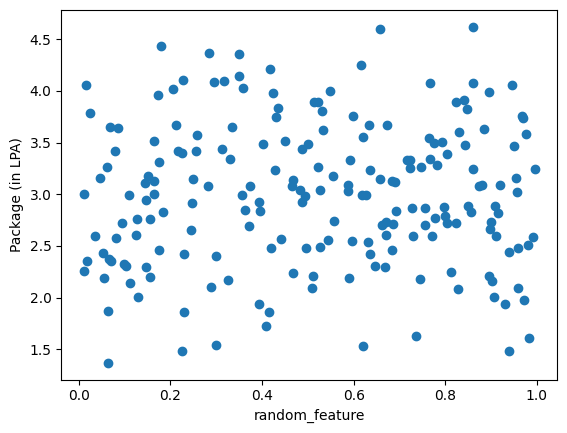

In [25]:
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package (in LPA)')

In [26]:
X = new_df1.iloc[:, 0:2]
y = new_df1.iloc[:, -1]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)

In [31]:
print("R2 score:", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 score: 0.7876011908877637


In [32]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7761201741789941

In [34]:
# now we will add a column that is relevant to our output

new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq', 'package']]

In [35]:
new_df2.sample(5)

,cgpa,iq,package
170,6.22,3.17,2.87
172,6.93,2.51,2.51
134,7.20,3.23,2.83
185,6.31,3.08,3.18
25,7.28,4.05,3.65


Text(0, 0.5, 'package (in LPA)')

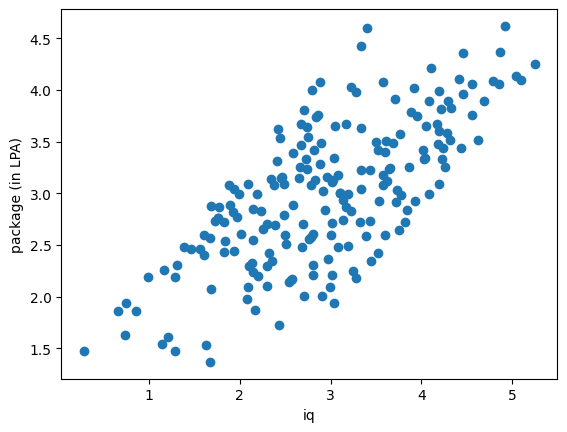

In [36]:
# iq is a relevant column

plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel('iq')
plt.ylabel('package (in LPA)')

In [37]:
np.random.randint(-100, 100)

77

In [38]:
X = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:,-1]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =2)

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [41]:
print("R2 score", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 score 0.8068817037366777


In [42]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7964428769116332